In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
score = lambda d: d['logret'].ewm(span = 7, min_periods = 7).mean().shift(1)

In [ ]:
df = pd.read_csv('test.csv')

In [46]:
#no short selling

#df = pd.read_csv('proj_data.csv')
#df = pd.read_csv('test.csv')
#df = df[df.tick == 'BTC-USD']
df[f'score'] = score(df)
df.dropna(subset=('score'), inplace=True)

df['position'] = df.score >=0
df['position_X_logret'] = df.position*df.logret

print(df)

plt.plot(df['position_X_logret'].cumsum(), label = 'ret to strategy')
plt.plot(df['logret'].cumsum(), label = 'buy and hold')

plt.legend()
plt.title('no short positions')
plt.show()

KeyError: 'logret'

0        0.0
8        0.0
14       0.0
15       0.0
20       0.0
        ... 
10944    1.0
10948    1.0
10952    0.0
10956    0.0
10960    0.0
Name: score, Length: 2192, dtype: float64
       Unnamed: 0        date       adj_prc           prc          high  \
0            3702  2024-11-05  69359.562500  69359.562500  70522.789062   
8            3701  2024-11-04  67811.507812  67811.507812  69433.179688   
14           3700  2024-11-03  68741.117188  68741.117188  69361.656250   
15           3699  2024-11-02  69289.273438  69289.273438  69867.351562   
20           3698  2024-11-01  69482.468750  69482.468750  71559.015625   
...           ...         ...           ...           ...           ...   
10944        1486  2018-10-12   6274.580078   6274.580078   6328.500000   
10948        1485  2018-10-11   6256.240234   6256.240234   6586.740234   
10952        1484  2018-10-10   6585.529785   6585.529785   6640.290039   
10956        1483  2018-10-09   6642.640137   6642.640137   6661.

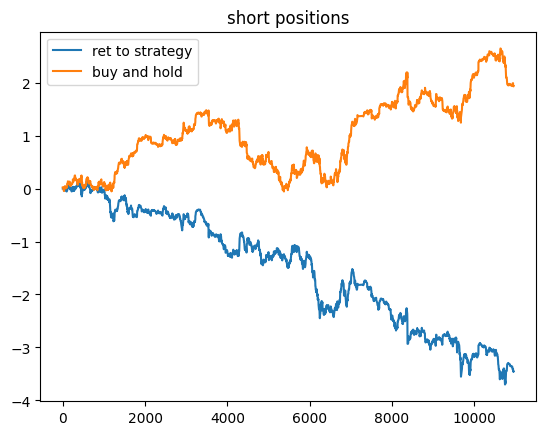

In [44]:
#short positions

df = pd.read_csv('proj_data.csv')
df = df[df.tick == 'BTC-USD']
df[f'score'] = score(df)
n = len(df)
mask_l = df.score >=0 
mask_s = df.score < 0
print(np.ones(n)*mask_l)
df['position'] = np.ones(n)*mask_l - np.ones(n)*mask_s
df['position_X_logret'] = df.position*df.logret

print(df)

plt.plot(df['position_X_logret'].cumsum(), label = 'ret to strategy')
plt.plot(df['logret'].cumsum(), label = 'buy and hold')

plt.legend()
plt.title('short positions')
plt.show()